In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt   
import seaborn as sns
from scipy.stats import zscore

In [2]:
Bank_df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheetname='Data')

In [3]:
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Bank_df.shape

(5000, 14)

In [6]:
Bank_df=Bank_df.drop(['ID', 'ZIP Code'], axis=1)

In [5]:
Bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
Bank_df['Mortgage'] = Bank_df['Mortgage'].map(lambda x: 1 if x > 0 else 0)
Bank_df['Mortgage'].value_counts()

0    3462
1    1538
Name: Mortgage, dtype: int64

In [9]:
Bank_df['Personal Loan']=Bank_df['Personal Loan'].astype('category')
Bank_df['Education']=Bank_df['Education'].astype('category')
Bank_df['Securities Account']=Bank_df['Securities Account'].astype('category')
Bank_df['CD Account']=Bank_df['CD Account'].astype('category')
Bank_df['Online']=Bank_df['Online'].astype('category')
Bank_df['CreditCard']=Bank_df['CreditCard'].astype('category')
Bank_df['Mortgage']=Bank_df['Mortgage'].astype('category')
Bank_df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage              category
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [15]:
Bank_df[~Bank_df.applymap(np.isreal).all(1)]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Binary


In [16]:
Bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0


In [17]:
Bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

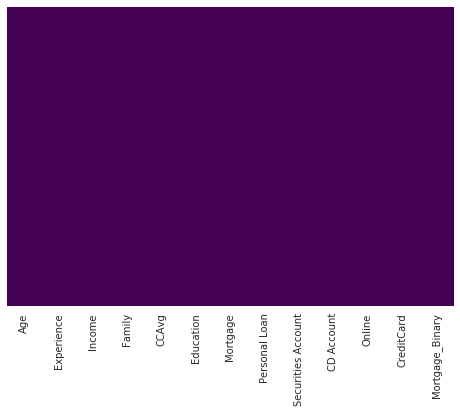

In [19]:
sns.heatmap(Bank_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
Bank_df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.013898,0.014206,0.010354,-0.003620,-0.015004,0.006278,0.012627,0.175880,1.000000,0.004210


In [18]:
Bank_df.corr()["Personal Loan"]

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

In [21]:
abc1= pd.crosstab(Bank_df['Education'], Bank_df['Personal Loan'], margins= True)
abc1
#In this table, we came to know that 2003 persons who belons to undergraduate they didnt opt for personal loan where as 93 
#person opt for personal loan plan, and 1221 persons who belons to graduate they didnt opt for personal loan where as 182 
#person opt for personal loan plan same as 1296 persons who belons to professional they didnt opt for personal loan where as 205 
#person opt for personal loan plan
#This means education level is directly proportional to personal loan.

Personal Loan,0,1,All
Education,,,
1,2003,93,2096
2,1221,182,1403
3,1296,205,1501
All,4520,480,5000


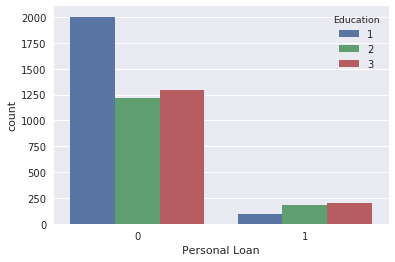

In [28]:
sns.countplot(x="Personal Loan", hue= "Education", data=Bank_df)

In [22]:
abc2= pd.crosstab(Bank_df['Securities Account'], Bank_df['Personal Loan'], margins= True)
abc2

Personal Loan,0,1,All
Securities Account,,,
0,4058,420,4478
1,462,60,522
All,4520,480,5000


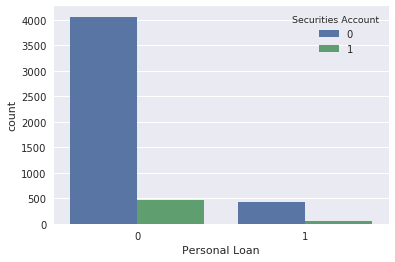

In [30]:
sns.countplot(x="Personal Loan", hue= "Securities Account", data=Bank_df)

In [23]:
abc3= pd.crosstab(Bank_df['CD Account'], Bank_df['Personal Loan'], margins= True)
abc3

Personal Loan,0,1,All
CD Account,,,
0,4358,340,4698
1,162,140,302
All,4520,480,5000


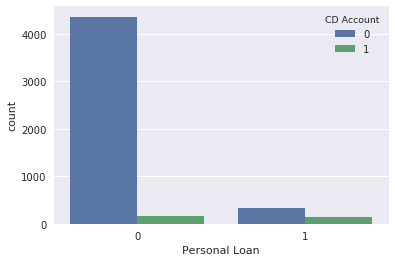

In [31]:
sns.countplot(x="Personal Loan", hue= "CD Account", data=Bank_df)

In [24]:
abc4= pd.crosstab(Bank_df['Online'], Bank_df['Personal Loan'], margins= True)
abc4

Personal Loan,0,1,All
Online,,,
0,1827,189,2016
1,2693,291,2984
All,4520,480,5000


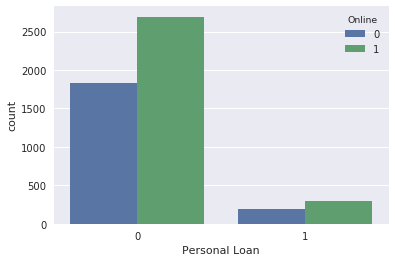

In [32]:
sns.countplot(x="Personal Loan", hue= "Online", data=Bank_df)

In [25]:
abc5= pd.crosstab(Bank_df['CreditCard'], Bank_df['Personal Loan'], margins= True)
abc5

Personal Loan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


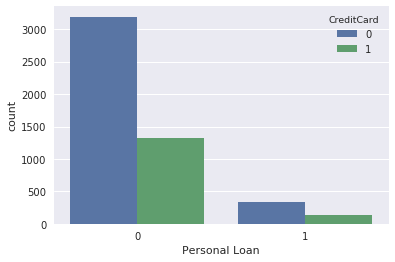

In [33]:
sns.countplot(x="Personal Loan", hue= "CreditCard", data=Bank_df)

In [22]:
abc6= pd.crosstab(Bank_df['Personal Loan'], Bank_df['Mortgage'], margins= True)
abc6

Mortgage,0,1,All
Personal Loan,,,
0,3150,1370,4520
1,312,168,480
All,3462,1538,5000


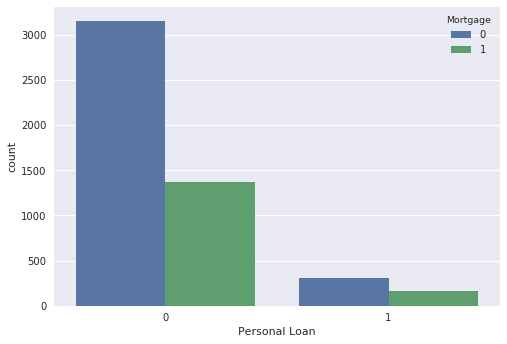

In [23]:
sns.countplot(x="Personal Loan", hue= "Mortgage", data=Bank_df)

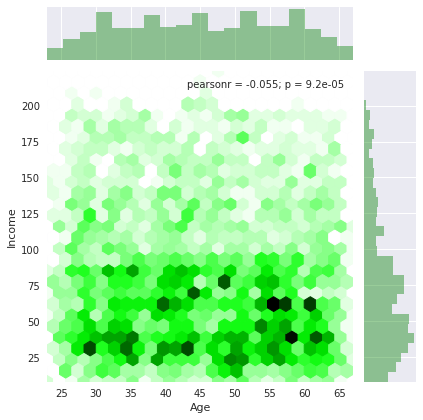

In [16]:
sns.jointplot(x='Age',y='Income',data=Bank_df,kind='hex',color='green')

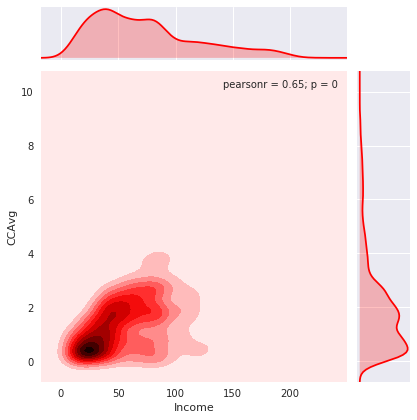

In [25]:
sns.jointplot(x='Income',y='CCAvg',data=Bank_df,color='red',kind='kde');

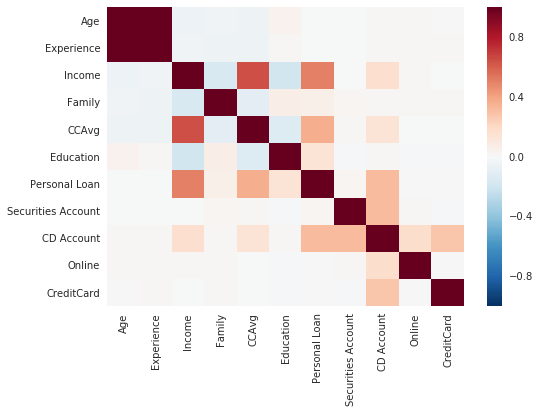

In [17]:
sns.heatmap(Bank_df.corr())

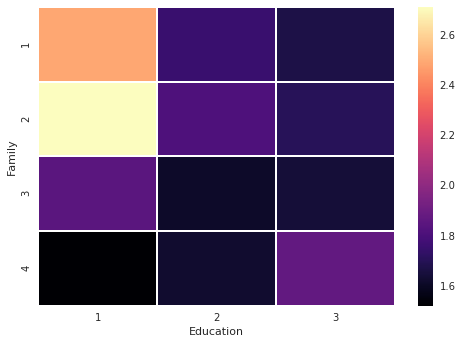

In [20]:
pv = Bank_df.pivot_table(values='CCAvg',index='Family',columns='Education')
sns.heatmap(pv,cmap='magma',linecolor='white',linewidths=1)

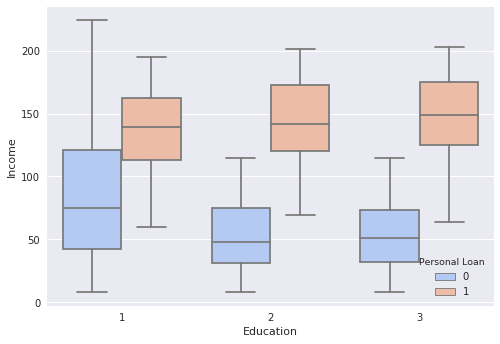

In [36]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan",data=Bank_df, palette="coolwarm")

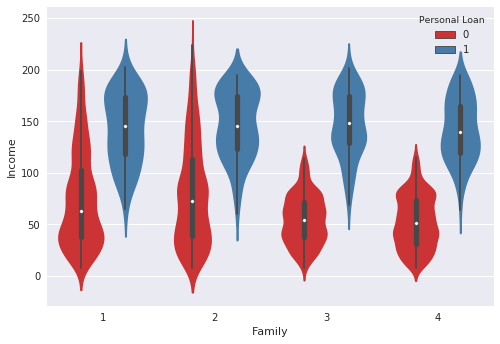

In [37]:
sns.violinplot(x="Family", y="Income", data=Bank_df,hue='Personal Loan',palette='Set1')

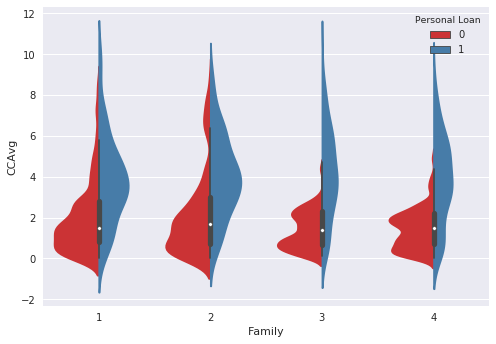

In [38]:
sns.violinplot(x="Family", y="CCAvg", data=Bank_df,hue='Personal Loan',split=True,palette='Set1')

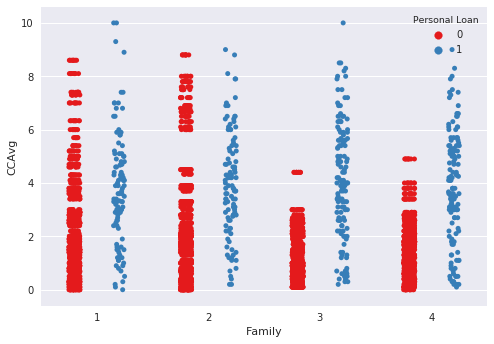

In [39]:
sns.stripplot(x="Family", y="CCAvg", data=Bank_df,jitter=True,hue='Personal Loan',palette='Set1',split=True)

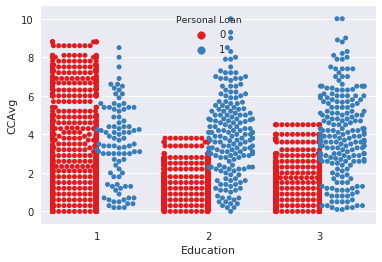

In [49]:
sns.swarmplot(x="Education", y="CCAvg",hue='Personal Loan',data=Bank_df, palette="Set1", split=True)

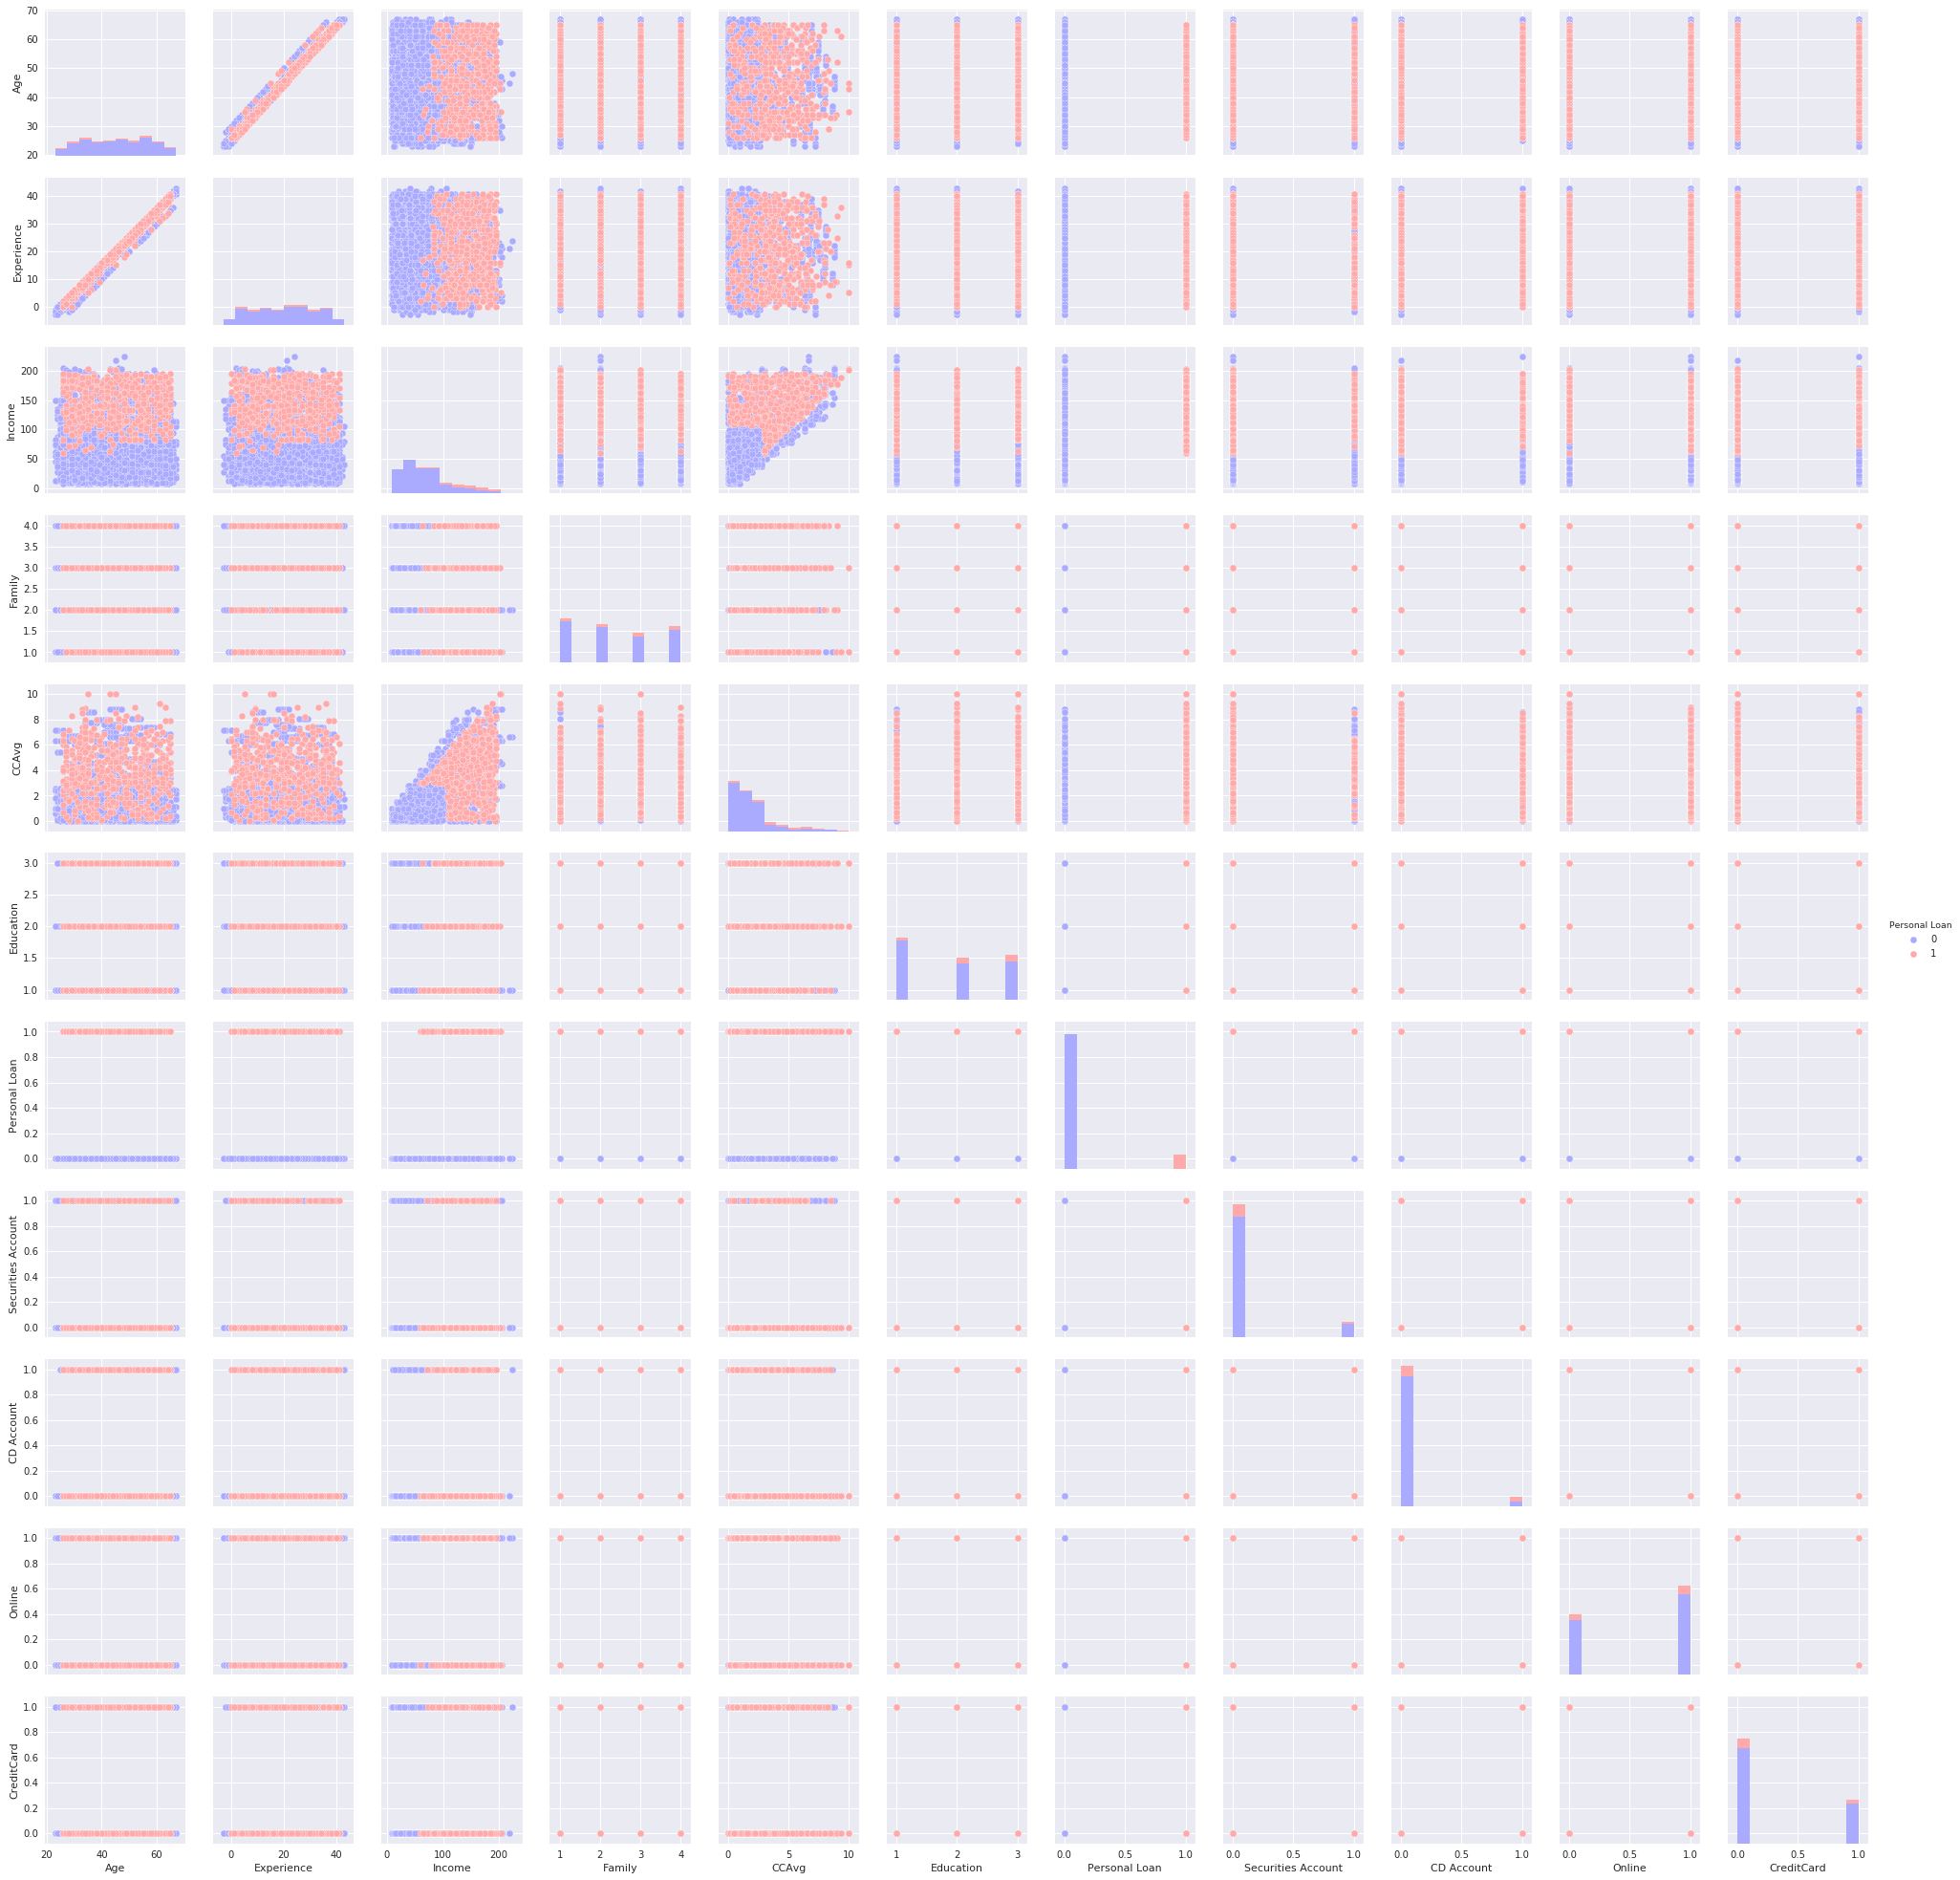

In [27]:
sns.pairplot(Bank_df,hue='Personal Loan',palette='bwr')

# Applying Logistic

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = Bank_df[['Age','Income','Family','CCAvg','Education','Securities Account','CD Account','Online','CreditCard','Mortgage']]
y = Bank_df['Personal Loan']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
predictions = logmodel.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1343
          1       0.86      0.58      0.69       157

avg / total       0.94      0.95      0.94      1500



In [18]:
logmodel.score(X_test, y_test)

0.94599999999999995

In [19]:
print(confusion_matrix(y_test,predictions))

[[1328   15]
 [  66   91]]


# Applying KNN

In [20]:
# Create a separate dataframe consisting only of the features i.e independent attributes

Bank_Features = Bank_df.drop(labels= "Personal Loan" , axis = 1)

In [21]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

Bank_Features_z = Bank_Features.apply(zscore)  # convert all attributes to Z scale

In [22]:
Bank_Predict = Bank_df["Personal Loan"]

In [23]:
# store the normalized features data into np array 

X = np.array(Bank_Features_z)

In [24]:
Y = np.array(Bank_Predict)

In [25]:
X_Train, X_test, Y_Train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [28]:
# Call Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 15 , weights = 'uniform', metric='minkowski')
NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [29]:
predicted_labels = NNH.predict(X_test)

In [32]:
# A small function to compare predicted values with actual and count how many are correct

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [33]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(y_test, predicted_labels)
print(accuracy_score)

94.3333333333


In [34]:
# To improve performance ------------------------- Iteration 2 -----------------------------------

In [35]:
bc_features_pruned_df_z =  Bank_Features_z.drop(['Age','Experience','CreditCard'], axis=1)
X = np.array(bc_features_pruned_df_z)

In [36]:
X_Train, X_test, Y_Train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [37]:
# Call Nearest Neighbour algorithm
NNH = KNeighborsClassifier(n_neighbors= 15 , weights = 'uniform', metric='minkowski')
NNH.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [38]:
predicted_labels = NNH.predict(X_test)

In [39]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

accuracy_score = getAccuracy(y_test, predicted_labels)

In [40]:
print(accuracy_score)

95.5333333333


In [41]:
print(classification_report(y_test,predicted_labels))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1343
          1       0.94      0.61      0.74       157

avg / total       0.95      0.96      0.95      1500



In [42]:
print(confusion_matrix(y_test,predicted_labels))

[[1337    6]
 [  61   96]]


# Applying Ensembles

In [43]:
X = Bank_df[['Age','Income','Family','CCAvg','Education','Securities Account','CD Account','Online','CreditCard','Mortgage']]
y = Bank_df['Personal Loan']

In [44]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [47]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )

In [48]:
lrcl = LogisticRegression(random_state=1)
rfcl = RandomForestClassifier(random_state=1)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=90)  #the base_estimator can be null. The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl)], voting = 'hard')

In [49]:
for clf, label in zip([lrcl , rfcl, nbcl, enclf, bgcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.95 (+/- 0.00) [Logistic Regression]
Accuracy: 0.99 (+/- 0.00) [RandomForest]
Accuracy: 0.89 (+/- 0.01) [NaiveBayes]
Accuracy: 0.97 (+/- 0.00) [Ensemble]
Accuracy: 0.98 (+/- 0.00) [Bagging]
